# Simple Linear Regression

This is a simple Linear Regression Problem to find the salary of employers based on their years of experience.

We will be using simple linear regression model for predicting the salaries.

In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the Dataset
df=pd.read_csv('Salary_Data.csv')

In [5]:
#Checking for the columns of dataset
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
#Shape of our Dataset
df.shape

(30, 2)

In [8]:
#info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [15]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
#Checking for any missing value
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

# Univariate Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x23aadc54dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x23aadc6a4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23aadc54978>],
 'medians': [<matplotlib.lines.Line2D at 0x23aadc6ab38>],
 'fliers': [<matplotlib.lines.Line2D at 0x23aadc6ae80>],
 'means': []}

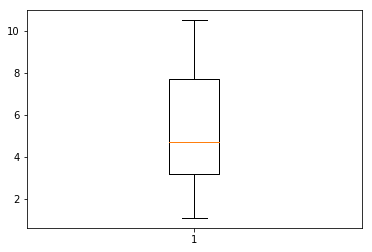

In [11]:
plt.boxplot(df['YearsExperience'])

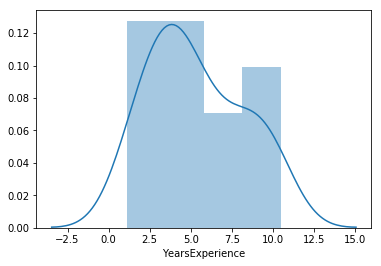

In [12]:
sns.distplot(df['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23aaed2fef0>,
 'caps': [<matplotlib.lines.Line2D at 0x23aaed3a898>,
 'boxes': [<matplotlib.lines.Line2D at 0x23aaed2fda0>],
 'medians': [<matplotlib.lines.Line2D at 0x23aaed3af28>],
 'fliers': [<matplotlib.lines.Line2D at 0x23aaed442b0>],
 'means': []}

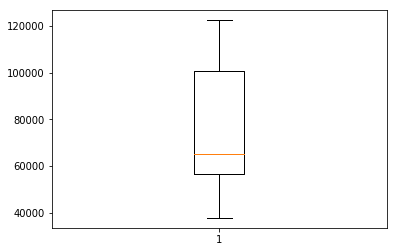

In [13]:
plt.boxplot(df['Salary'])

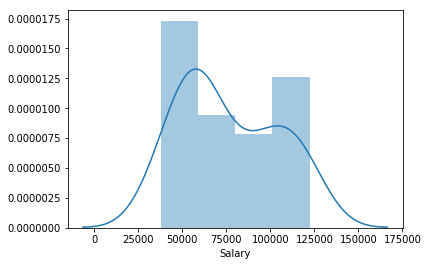

In [14]:
sns.distplot(df['Salary'])

# Bivariate Analysis

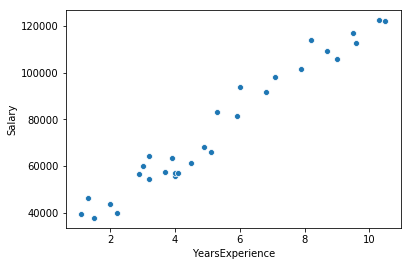

In [16]:
 sns.scatterplot(x='YearsExperience',y='Salary',data=df)

We can see that there is a linear relationship between the two variables.

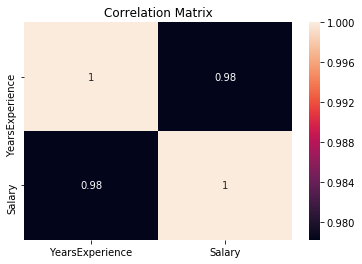

In [17]:
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True)

The dependent variable is highly correlated with the independent variable.

Splitting dataset

In [19]:
X=df.iloc[:,0]
Y=df.iloc[:,1]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
print("Shape of X_train is: ",X_train.shape)
print("Shape of X_test is: ",X_test.shape)
print("Shape of Y_train is: ",Y_train.shape)
print("Shape of Y_test is: ",Y_test.shape)

Shape of X_train is:  (21,)
Shape of X_test is:  (9,)
Shape of Y_train is:  (21,)
Shape of Y_test is:  (9,)


In [22]:
#Adding new column
X_train=X_train[:,np.newaxis]
X_test=X_test[:,np.newaxis]

Linear Model

In [23]:
from sklearn.linear_model import LinearRegression
lrg=LinearRegression()

In [24]:
lrg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
lrg.score(X_train,Y_train)

0.960775692121653

In [26]:
Y_pred=lrg.predict(X_test)

In [27]:
data={'Y_test':Y_test,'Y_pred':Y_pred}
pd.DataFrame(data=data)

,Y_test,Y_pred
17,83088.0,74821.415786
21,98273.0,91385.436263
10,63218.0,61938.288749
19,93940.0,81262.979305
14,61111.0,67459.628908
20,91738.0,88624.766184
26,116969.0,113470.796899
3,43525.0,44454.044912
24,109431.0,106109.010020


In [32]:
print(lrg.intercept_)
print(lrg.coef_)

26049.577715443353
[9202.23359825]


Text(0, 0.5, 'Residues')

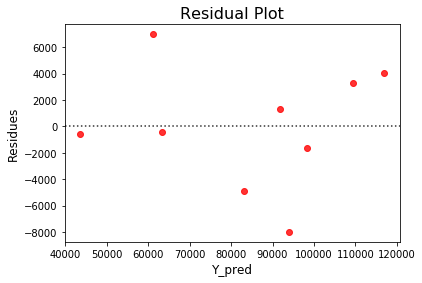

In [33]:
plt.title('Residual Plot',size=16)
sns.residplot(Y_test,Y_pred,color='r')
plt.xlabel('Y_pred',size=12)
plt.ylabel('Residues',size=12)

There is no pattern which means model is good.

Evaluating model

In [62]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_pred)
print('r2_score is: ',r2)

r2_score is:  0.9248580247217075
